The goal of this notebook is to use the PISA scores of countries to predict their employment rates, and then use the Employment Rates of a country to predict its GDP per Capita (PPP).

Link for the repository on GitHub:

https://github.com/tlemenestrel/GDP_and_Employment_Rates_Prediction

Link for the .csv file:

Employment Rates:

https://raw.githubusercontent.com/tlemenestrel/GDP_and_Employment_Rates_Prediction/master/Employment_Rates_Prediction.csv

GDP:

https://raw.githubusercontent.com/tlemenestrel/GDP_and_Employment_Rates_Prediction/master/GDP_Prediction.csv

In [3498]:
# Import the necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [3499]:
# Downloading the Employment Rates .csv file from GitHub

url_employment_rates = "https://raw.githubusercontent.com/tlemenestrel/GDP_and_Employment_Rates_Prediction/master/Employment_Rates_Prediction.csv"

# Reading the downloaded content and making it a pandas dataframe

employment_rates_df = pd.read_csv(url_employment_rates)

# Printing out the first 5 rows of the dataframe

print (employment_rates_df.head())

                   COUNTRY  MANDATORY YEARS OF EDUCATION   PISA  POPULATION  \
0                Argentina                            14  395.0    44293293   
1          North Macedonia                            13  400.0     2103721   
2   Bosnia and Herzegovina                             9  402.3     3856181   
3               Costa Rica                            13  414.7     4930258   
4                   Mexico                            14  416.0   124574795   

   LABOUR FORCE  EMPLOYMENT RATES  
0      18000000             42.60  
1        950800             47.40  
2       1380000             43.00  
3       2229000             58.70  
4      54510000             61.53  


In [3500]:
# Print the data type of each column to decide which ones to convert to float

dataTypeSeries = employment_rates_df.dtypes
 
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
COUNTRY                          object
MANDATORY YEARS OF EDUCATION      int64
PISA                            float64
POPULATION                        int64
LABOUR FORCE                      int64
EMPLOYMENT RATES                float64
dtype: object


In [3501]:
# Replacing white spaces with underscores

employment_rates_df.columns = employment_rates_df.columns.str.replace(' ', '_')

# Dropping the columns we are not going to use

employment_rates_df = employment_rates_df.drop('COUNTRY', axis = 1)

# Converting all columns to float

employment_rates_df = employment_rates_df.apply(pd.to_numeric)

print (employment_rates_df.head())

   MANDATORY_YEARS_OF_EDUCATION   PISA  POPULATION  LABOUR_FORCE  \
0                            14  395.0    44293293      18000000   
1                            13  400.0     2103721        950800   
2                             9  402.3     3856181       1380000   
3                            13  414.7     4930258       2229000   
4                            14  416.0   124574795      54510000   

   EMPLOYMENT_RATES  
0             42.60  
1             47.40  
2             43.00  
3             58.70  
4             61.53  


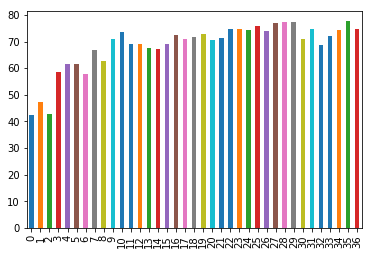

In [3502]:
ax = employment_rates_df['EMPLOYMENT_RATES'].plot(kind="bar")

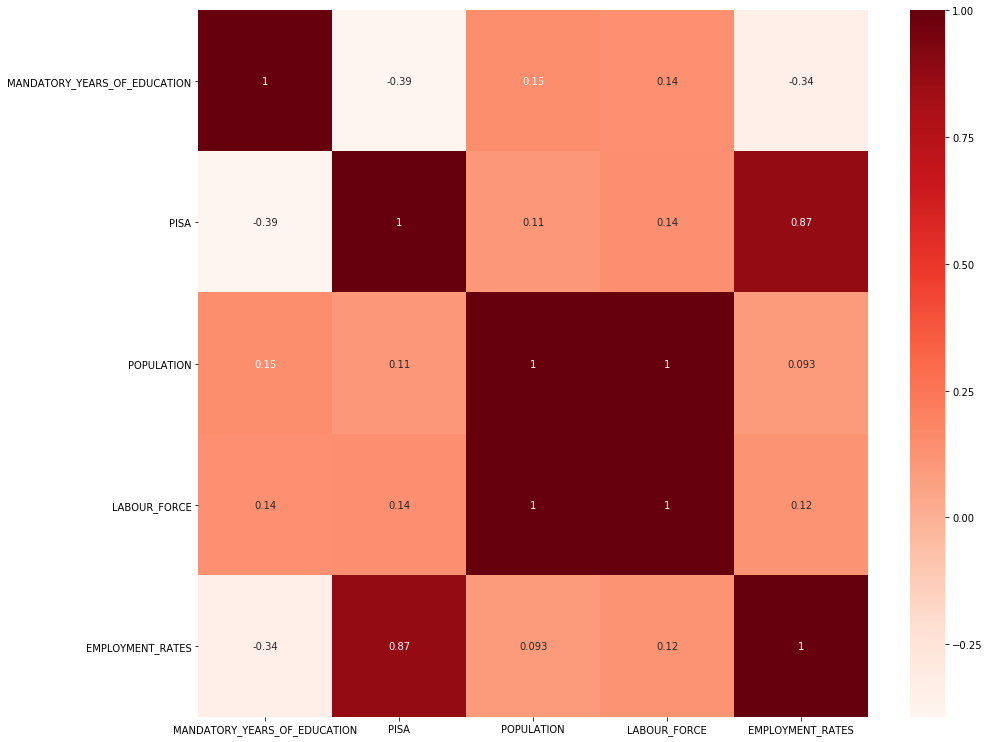

MANDATORY_YEARS_OF_EDUCATION    0.342411
PISA                            0.872753
EMPLOYMENT_RATES                1.000000
Name: EMPLOYMENT_RATES, dtype: float64


In [3503]:
# Selecting the features for the model

# Using Pearson Correlation

plt.figure(figsize=(15,13))
cor = employment_rates_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable i.e.Employment Rates

correlation_target = abs(cor["EMPLOYMENT_RATES"])

# Selecting highly correlated features

relevant_features = correlation_target[correlation_target>0.2]
print(relevant_features)

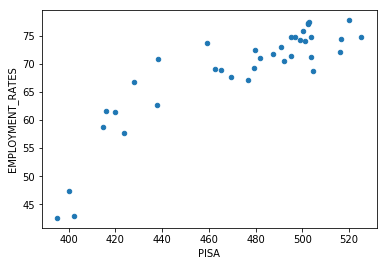

In [3504]:
# Plotting PISA Scores versus Employment Rates

employment_rates_df.plot(kind ='scatter', x = 'PISA', y = 'EMPLOYMENT_RATES')
plt.show()

# Difference between min-max normalization and standard normalization:

-Min-max normalization: 

Guarantees all features will have the exact same scale but does not handle outliers well.

-Z-score normalization: 

Handles outliers well, but does not produce normalized data with the exact same scale.

Tutorial:

https://www.codecademy.com/articles/normalization

Code for standard (or mean) normalization:

normalized_df=(df-df.mean())/df.std()

Code for min-max normalization:

normalized_df = (df-df.min())/(df.max()-df.min())

In [3505]:
# Normalizing all the features using standard (or mean) normalization

employment_rates_df = (employment_rates_df-employment_rates_df.mean())/employment_rates_df.std()

print (employment_rates_df.head())

   MANDATORY_YEARS_OF_EDUCATION      PISA  POPULATION  LABOUR_FORCE  \
0                      1.657648 -2.049662    0.196684      0.068828   
1                      1.084443 -1.918401   -0.482881     -0.483472   
2                     -1.208379 -1.858021   -0.454654     -0.469568   
3                      1.084443 -1.532493   -0.437353     -0.442065   
4                      1.657648 -1.498365    1.489813      1.251550   

   EMPLOYMENT_RATES  
0         -2.912202  
1         -2.374100  
2         -2.867360  
3         -1.107320  
4         -0.790064  


In [3506]:
# First using a linear model

# Separating the data into x and y

y = employment_rates_df['EMPLOYMENT_RATES']

X = employment_rates_df[['PISA']]

In [3507]:
linear_model = LinearRegression()

linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [3508]:
# Use the linear model on the testing data

y_linear_pred = linear_model.predict(X)

# Print the R2 score 

print ("R2 score:\n") 
print (('{:.2f}'.format((100*(r2_score(y, y_linear_pred))))) + " %\n")

# Print the mean squared error

print ("Mean-squared error:\n")
print(mean_squared_error(y, y_linear_pred))

R2 score:

76.17 %

Mean-squared error:

0.23186154573358841


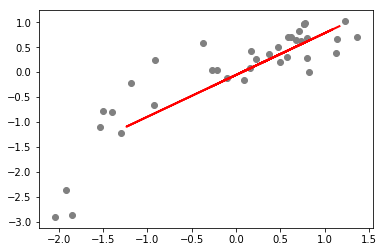

In [3509]:
# Plotting the results of the linear model

plt.scatter(X, y,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [3510]:
# Then, using a quadratic model

# Separating the data into x and y

y = employment_rates_df['EMPLOYMENT_RATES']

X = employment_rates_df['PISA']

# transforming the data to include another axis for x and y

y = y[:, np.newaxis]

X = X[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=3, include_bias = False)

X_polynomial = polynomial_features.fit_transform(X)

In [3511]:
quadratic_model = LinearRegression()

quadratic_model.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [3512]:
# Use the quadratic model on the testing data

y_polynomial_prediction = quadratic_model.predict(X_polynomial)

# Print the R2 score 

print ("R2 score:\n") 
print (('{:.2f}'.format((100*(r2_score(y_polynomial_prediction, y))))) + " %\n")

# Print the mean squared error

print ("Mean-squared error:\n")
print(mean_squared_error(y, y_polynomial_prediction))

R2 score:

88.51 %

Mean-squared error:

0.1002590888961698


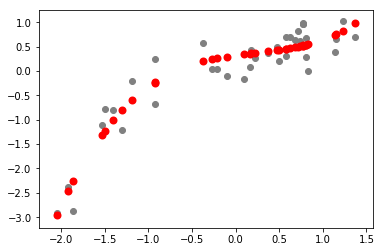

In [3513]:
# Plotting the results of the quadratic model

plt.scatter(X, y,  color='gray')
plt.scatter(X,y_polynomial_prediction, color='red', linewidth=2)
plt.show()

In [3514]:
# Downloading the Employment Rates .csv file from GitHub

url_gdp = "https://raw.githubusercontent.com/tlemenestrel/GDP_and_Employment_Rates_Prediction/master/GDP_Prediction.csv"

# Reading the downloaded content and making it a pandas dataframe

gdp_df = pd.read_csv(url_gdp)

# Printing out the first 5 rows of our dataframe

print (gdp_df.head())

                   COUNTRY  LABOUR FORCE  POPULATION  GROSS NATIONAL SAVING  \
0                  Moldova       1295000     3474121                   17.0   
1                   Kosovo        500300     1895250                   12.5   
2   Bosnia and Herzegovina       1380000     3856181                   11.0   
3                   Serbia       2920000     7111024                   14.0   
4                  Romania       8951000    21529967                   21.5   

   EMPLOYMENT RATES  GDP PER CAPITA PPP  
0             0.418                5700  
1             0.402               10400  
2             0.430               11400  
3             0.474               15200  
4             0.667               24000  


In [3515]:
# Print the data type of each column to decide which ones to convert to float

dataTypeSeries =  gdp_df.dtypes
 
print('Data type of each column of the GDP Dataframe :')
print(dataTypeSeries)

Data type of each column of the GDP Dataframe :
COUNTRY                   object
LABOUR FORCE               int64
POPULATION                 int64
GROSS NATIONAL SAVING    float64
EMPLOYMENT RATES         float64
GDP PER CAPITA PPP         int64
dtype: object


In [3516]:
# Replacing white spaces with underscores

gdp_df.columns = gdp_df.columns.str.replace(' ', '_')

# Dropping the columns we are not going to use

gdp_df = gdp_df.drop('COUNTRY', axis = 1)

# Converting all columns to float

gdp_df = gdp_df.apply(pd.to_numeric)

print (gdp_df.head())

   LABOUR_FORCE  POPULATION  GROSS_NATIONAL_SAVING  EMPLOYMENT_RATES  \
0       1295000     3474121                   17.0             0.418   
1        500300     1895250                   12.5             0.402   
2       1380000     3856181                   11.0             0.430   
3       2920000     7111024                   14.0             0.474   
4       8951000    21529967                   21.5             0.667   

   GDP_PER_CAPITA_PPP  
0                5700  
1               10400  
2               11400  
3               15200  
4               24000  


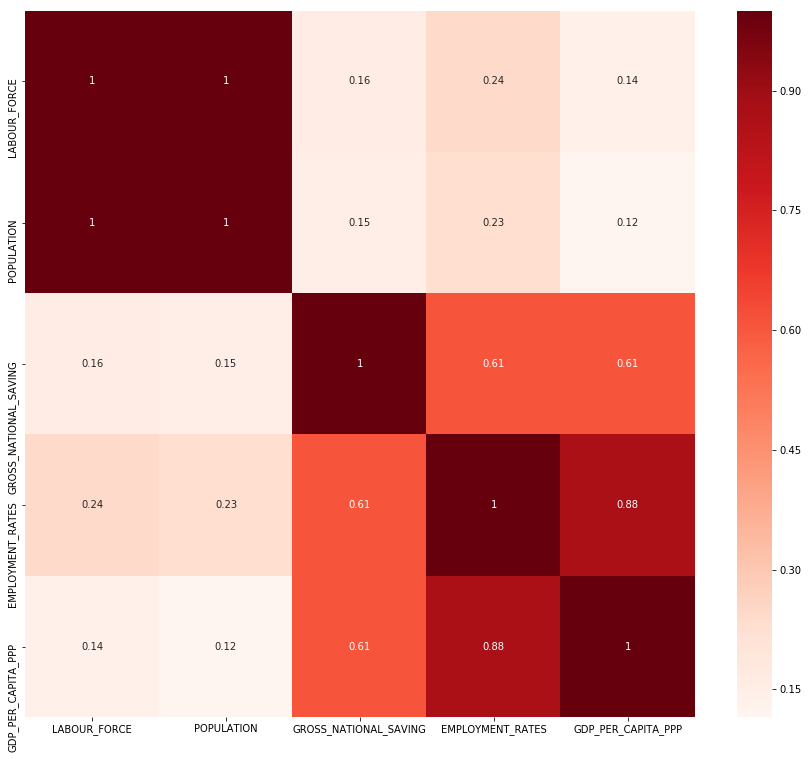

GROSS_NATIONAL_SAVING    0.606072
EMPLOYMENT_RATES         0.875147
GDP_PER_CAPITA_PPP       1.000000
Name: GDP_PER_CAPITA_PPP, dtype: float64


In [3517]:
# Selecting the features for the model

# Using Pearson Correlation

plt.figure(figsize=(15,13))
cor = gdp_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable i.e.Employment Rates

correlation_target = abs(cor["GDP_PER_CAPITA_PPP"])

# Selecting highly correlated features

relevant_features = correlation_target[correlation_target>0.2]
print(relevant_features)

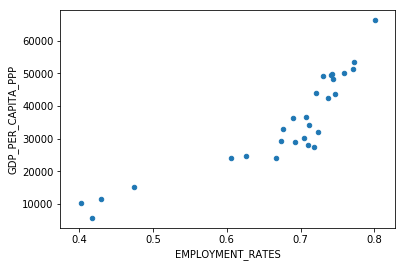

In [3518]:
# Plotting Employment Rates versus GDP

gdp_df.plot(kind ='scatter', x = 'EMPLOYMENT_RATES', y = 'GDP_PER_CAPITA_PPP')
plt.show()

In [3519]:
# Normalizing all the features using standard (or mean) normalization

gdp_df = (gdp_df-gdp_df.mean())/gdp_df.std()

print (gdp_df.head())

   LABOUR_FORCE  POPULATION  GROSS_NATIONAL_SAVING  EMPLOYMENT_RATES  \
0     -0.521634   -0.518061              -0.826065         -2.334101   
1     -0.569191   -0.569358              -1.515820         -2.479453   
2     -0.516547   -0.505649              -1.745739         -2.225087   
3     -0.424388   -0.399902              -1.285902         -1.825369   
4     -0.063473    0.068557              -0.136309         -0.072060   

   GDP_PER_CAPITA_PPP  
0           -1.993806  
1           -1.673590  
2           -1.605459  
3           -1.346561  
4           -0.747008  


In [3520]:
# First using a linear model

# Separating the data into x and y

y = gdp_df['GDP_PER_CAPITA_PPP']

X = gdp_df[['EMPLOYMENT_RATES']]

In [3521]:
linear_model = LinearRegression()

linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [3522]:
# Use the linear model on the testing data

y_linear_pred = linear_model.predict(X)

# Print the R2 score 

print ("R2 score:\n") 
print (('{:.2f}'.format((100*(r2_score(y, y_linear_pred))))) + " %\n")

# Print the mean squared error

print ("Mean-squared error:\n")
print(mean_squared_error(y, y_linear_pred))

R2 score:

76.59 %

Mean-squared error:

0.22575604645878253


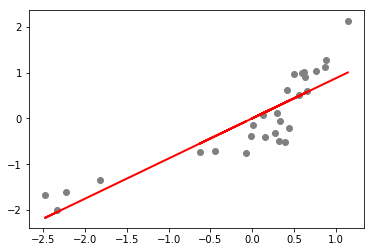

In [3523]:
# Plotting the results of the linear model

plt.scatter(X, y,  color='gray')
plt.plot(X, y_linear_pred, color='red', linewidth=2)
plt.show()

In [3524]:
# Then, using a quadratic model

# Separating the data into x and y

y = gdp_df['GDP_PER_CAPITA_PPP']

X = gdp_df['EMPLOYMENT_RATES']

# transforming the data to include another axis for x and y

y = y[:, np.newaxis]

X = X[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree = 3, include_bias = False)

X_polynomial = polynomial_features.fit_transform(X)

In [3525]:
quadratic_model = LinearRegression()

quadratic_model.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [3526]:
# Use the quadratic model on the testing data

y_polynomial_prediction = quadratic_model.predict(X_polynomial)

# Print the R2 score 

print ("R2 score:\n") 
print (('{:.2f}'.format((100*(r2_score(y_polynomial_prediction, y))))) + " %\n")

# Print the mean squared error

print ("Mean-squared error:\n")
print(mean_squared_error(y, y_polynomial_prediction))

R2 score:

90.06 %

Mean-squared error:

0.08718860148133509


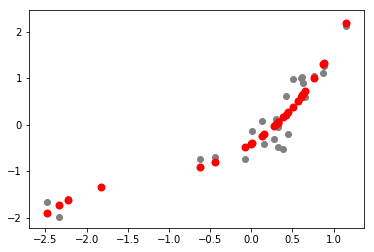

In [3527]:
# Plotting the results of the quadratic model

plt.scatter(X, y,  color='gray')
plt.scatter(X,y_polynomial_prediction, color='red', linewidth=2)
plt.show()